In [106]:
import lightkurve as lk

import matplotlib.pyplot as plt
import numpy as np

from astropy import units as u

# Search for data

We will have a look at TESS data. lightcurvefiles and targetpixelfiles only exist for a list of preselected targets like beta Pic. Those are being observed with short cadence (2 min).
If you want to extract a light curve for non short cadence stars, you have to use TESScut (later...).

In [98]:
name = '49 Ceti'

In [89]:
search_results = lk.search_lightcurvefile(name)
search_results

You see, we have 4 sectors of data

In [99]:
lcs = search_results.download_all()
lcs

LightCurveFileCollection of 1 objects:
TessLightCurveFile(TICID: 54003409) 

Combine if necassary...

In [107]:
lc = lcs[0].PDCSAP_FLUX.remove_nans().normalize()


if len(lcs) > 1:
    for i in range(1, len(lcs)):
        lc = lc.append(lcs[i].PDCSAP_FLUX.remove_nans().normalize())
else:
    print('Only one Sector')

Only one Sector


(0.998, 1.002)

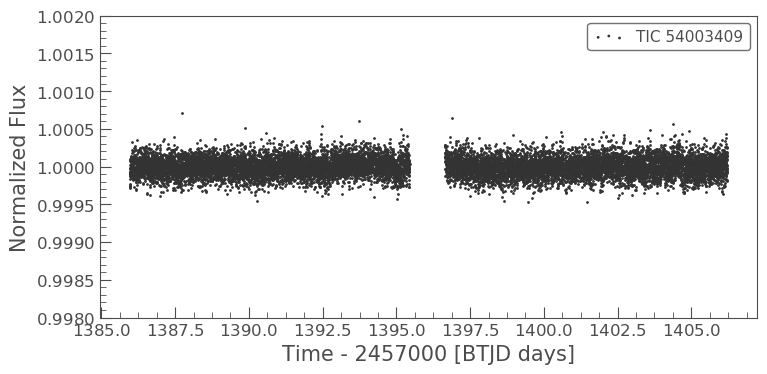

In [110]:
quality_mask = lc.quality == 0

lc_reduced = lc[quality_mask].remove_nans()

lc_reduced.scatter()
#plt.ylim(0.998, 1.002)

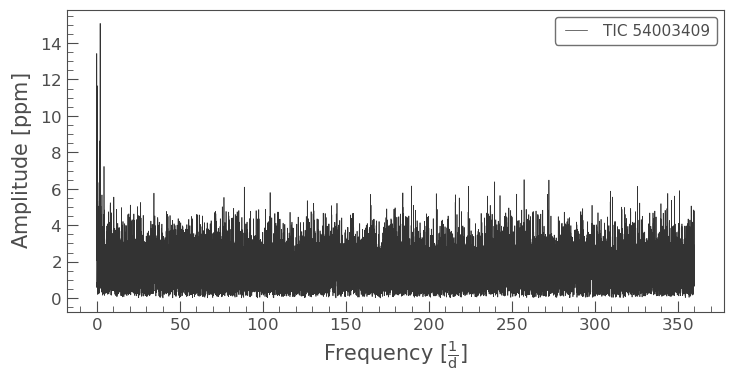

In [111]:
p = lc_reduced.to_periodogram(method='LombScargle', minimum_frequency=0.01, maximum_frequency=360, oversample_factor=10, normalization = 'amplitude', freq_unit=1/u.day)
p.plot()

The SAP_FLUX is the "raw" Simple Aperture Photometry data. The PDCSAP_FLUX is the light curve, reduced by the SPOC  pipeline at NASA AMES. Usally it should be "better".

The big feature between BTJD 1421 and BTJD1424 is caused by instrumental issues during this time.

The few outliers are also created by instr. issiues. They are mark with non zero values in the quality list:

In [11]:
lcs[0].PDCSAP_FLUX.quality

array([ 0,  0,  0, ..., 16, 16, 16], dtype=int32)

Let's remove those measurements with non zero quality values

In [1]:
names = ['beta Pic',
        'HR 10',
        'HR 3921',
        '49 Ceti',
        '5 Vul',
        '2 And',
        'HR 1056',
        'HR 2174',
        'rho Vir',
        'HR 6051',
        'HD 172555',
        'lambda Gem',
        'HD 58647',
        'phi Gem',
        'delta Crv',
        'HR 4796A',
        'phi Leo',
        'c Aql',
        'HD 156623',
        'HD 24966',
        'HD 38056',
        'theta Hya',
        'HD 225200',
        'eta Crv']

# HD 37306

In [84]:
import lightkurve as lk

In [2]:
name1 = 'HD 37306'

In [3]:
search_results = lk.search_lightcurvefile(name1)
search_results

SearchResult containing 1 data products.

target_name                     productFilename                     description  distance
----------- ------------------------------------------------------- ------------ --------
  287842651 tess2018349182459-s0006-0000000287842651-0126-s_lc.fits Light curves      0.0

In [4]:
lcs = search_results.download_all()
lcs

LightCurveFileCollection of 1 objects:
TessLightCurveFile(TICID: 287842651) 

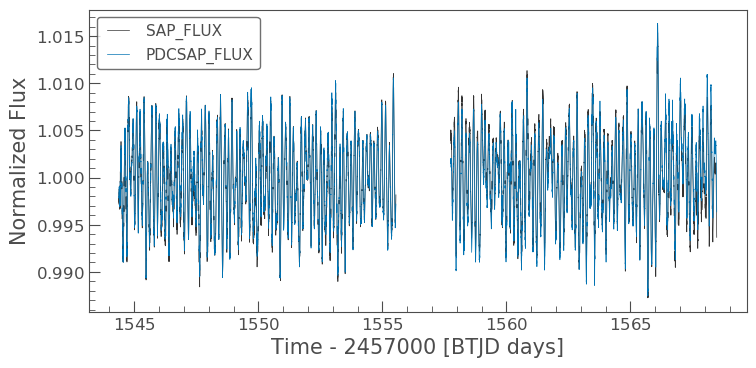

In [86]:
lcs[0].plot()

(0.9995, 1.0005)

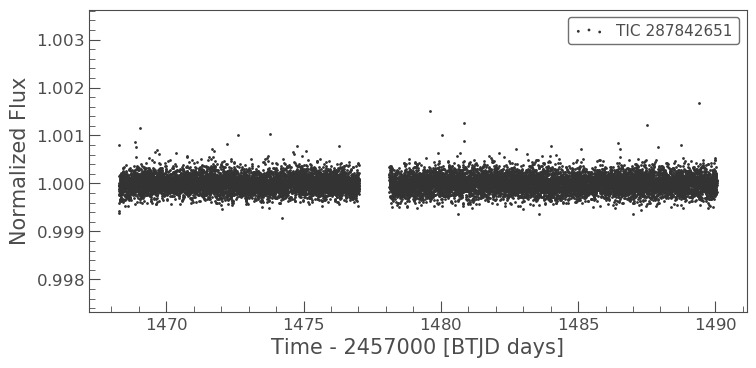

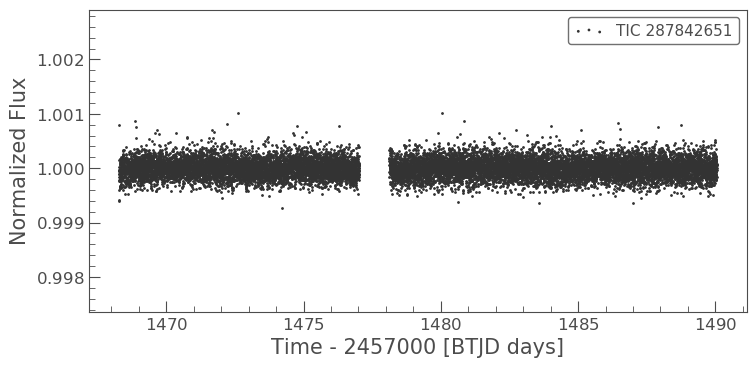

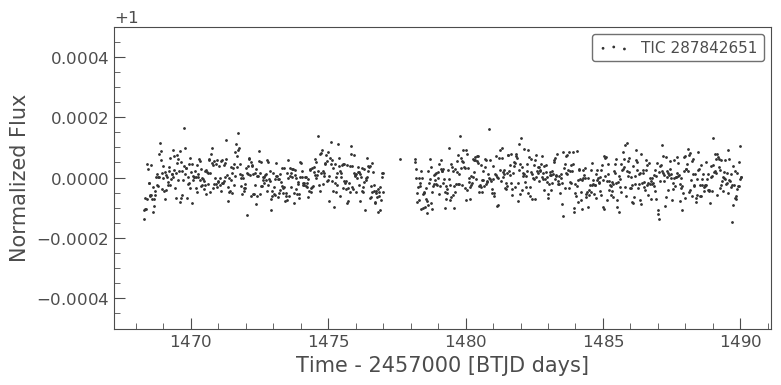

In [21]:
quality_mask = lcs[0].PDCSAP_FLUX.quality == 0

lcs[0].PDCSAP_FLUX.scatter()
lcs[0].PDCSAP_FLUX[quality_mask].scatter()
lcs[0].PDCSAP_FLUX[quality_mask].bin(15).scatter()
plt.ylim(0.9995, 1.0005)

In [13]:
from astropy import units as u

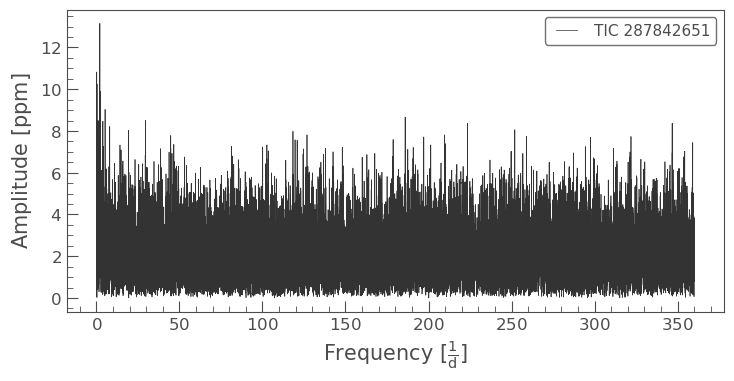

In [16]:
p = lcs[0].PDCSAP_FLUX[quality_mask].remove_nans().to_periodogram(method='LombScargle', minimum_frequency=0.01, maximum_frequency=360, oversample_factor=10, normalization = 'amplitude', freq_unit=1/u.day)
p.plot()

In [17]:
lcs[0].PDCSAP_FLUX[quality_mask].remove_nans().time

array([1468.27680528, 1468.27819417, 1468.27958306, ..., 1490.04587477,
       1490.0472636 , 1490.04865244])

In [18]:
lcs[0].PDCSAP_FLUX[quality_mask].remove_nans().flux

array([586259.8 , 585933.8 , 586138.56, ..., 586203.7 , 586153.3 ,
       586179.25], dtype=float32)

In [22]:
lc_reduced = lcs[0].PDCSAP_FLUX[quality_mask].remove_nans()

In [23]:
lc_reduced.time

array([1468.27680528, 1468.27819417, 1468.27958306, ..., 1490.04587477,
       1490.0472636 , 1490.04865244])

In [24]:
lc_reduced.flux

array([586259.8 , 585933.8 , 586138.56, ..., 586203.7 , 586153.3 ,
       586179.25], dtype=float32)

In [25]:
datapairs=np.stack((lc_reduced.time, -2.5*np.log10(lc_reduced.flux)), axis=-1)
np.savetxt('HD37306.txt',datapairs)

# Phi Leo

In [26]:
name2 = 'Phi Leo'

In [27]:
search_results = lk.search_lightcurvefile(name2)
search_results

SearchResult containing 1 data products.

target_name                     productFilename                     description  distance
----------- ------------------------------------------------------- ------------ --------
  443616529 tess2019058134432-s0009-0000000443616529-0139-s_lc.fits Light curves      0.0

In [28]:
lcs = search_results.download_all()
lcs

LightCurveFileCollection of 1 objects:
TessLightCurveFile(TICID: 443616529) 

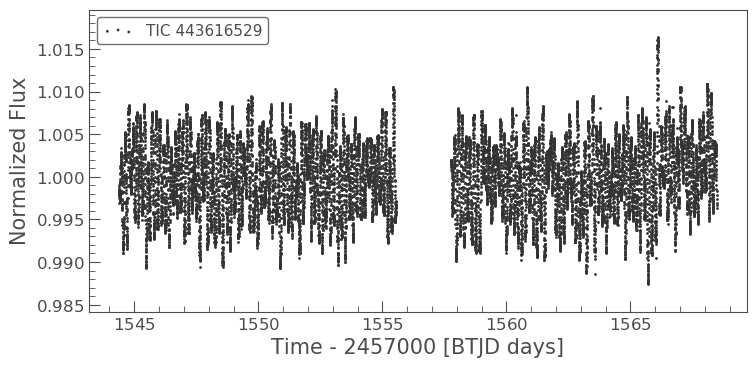

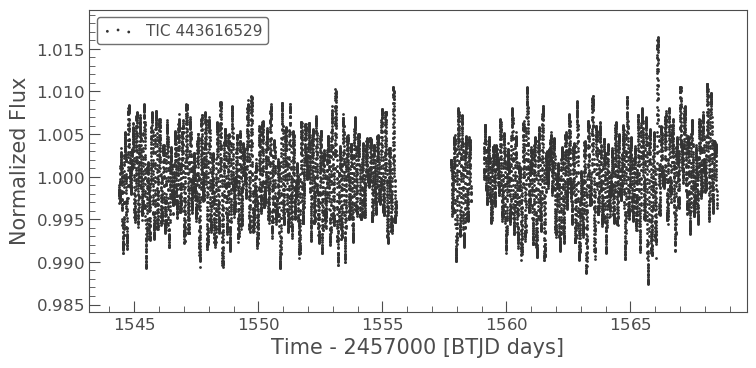

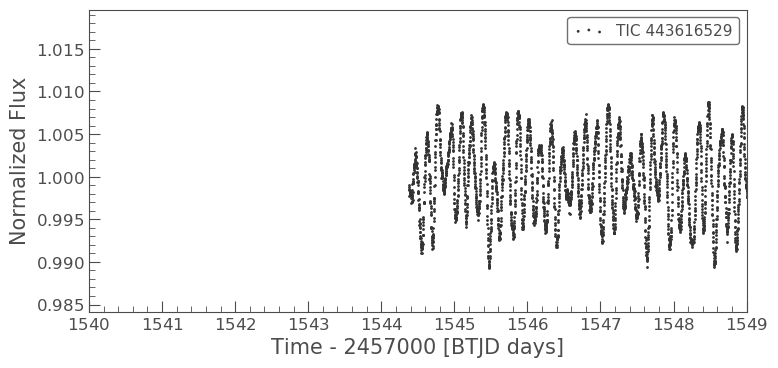

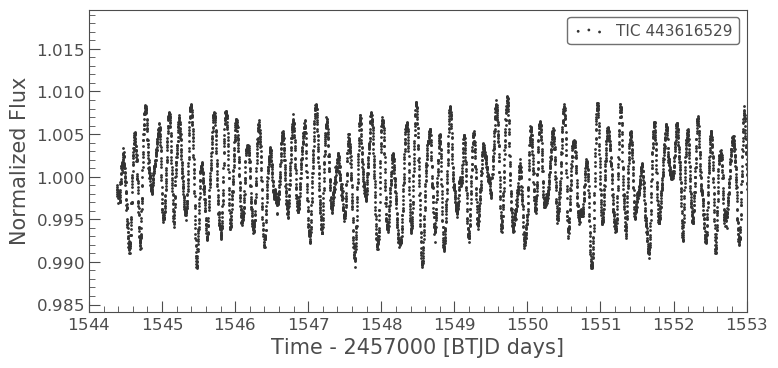

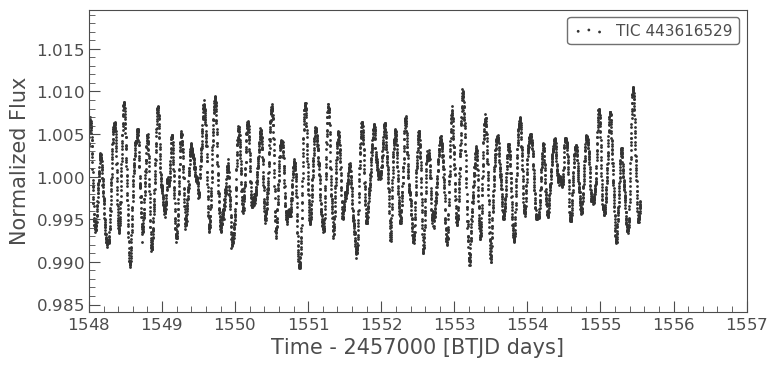

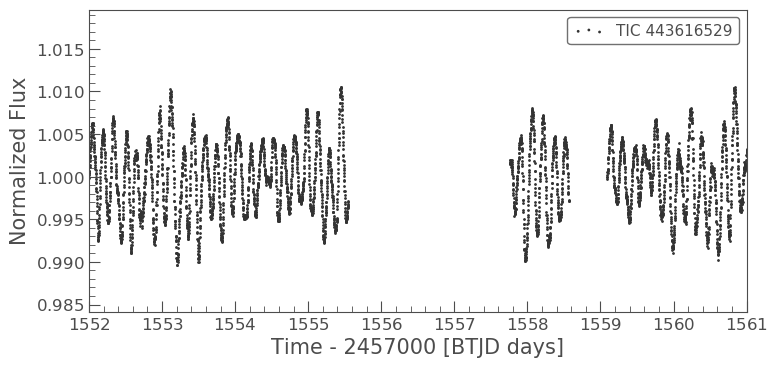

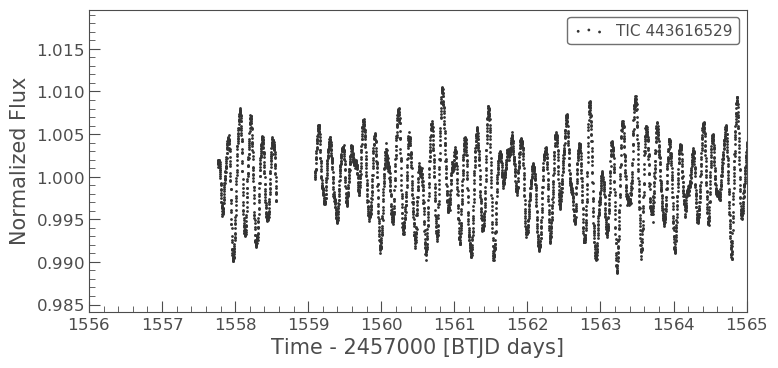

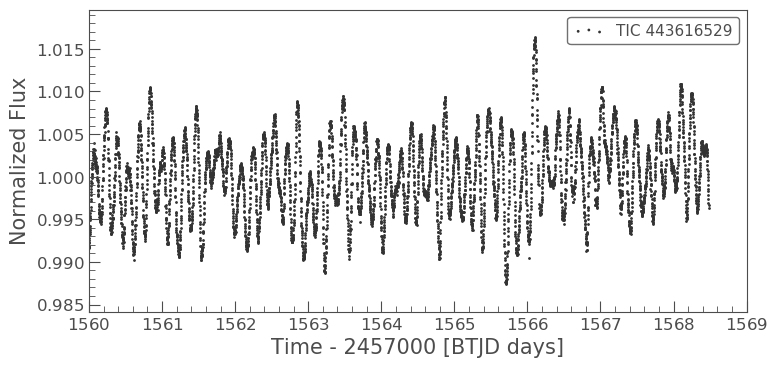

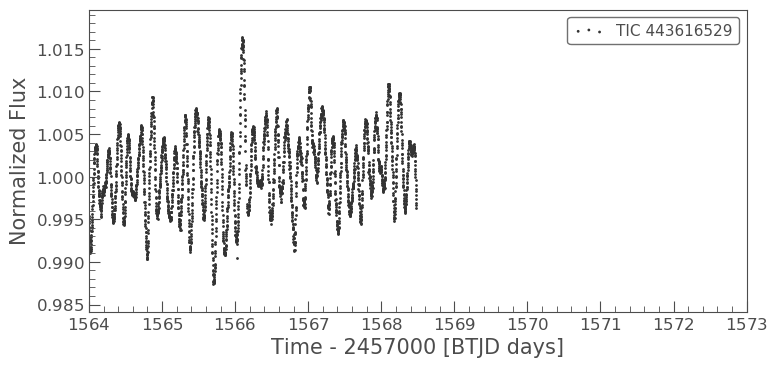

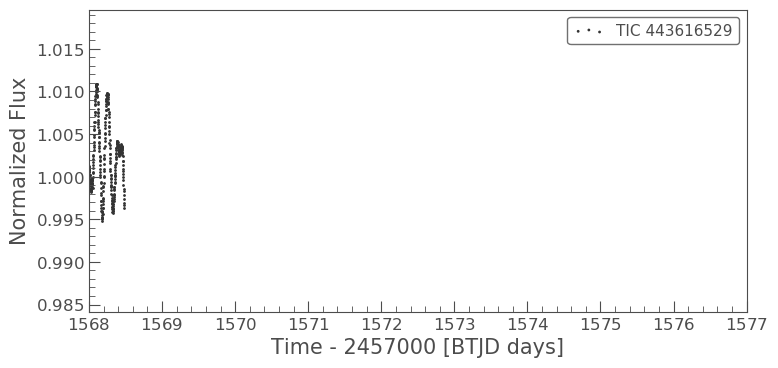

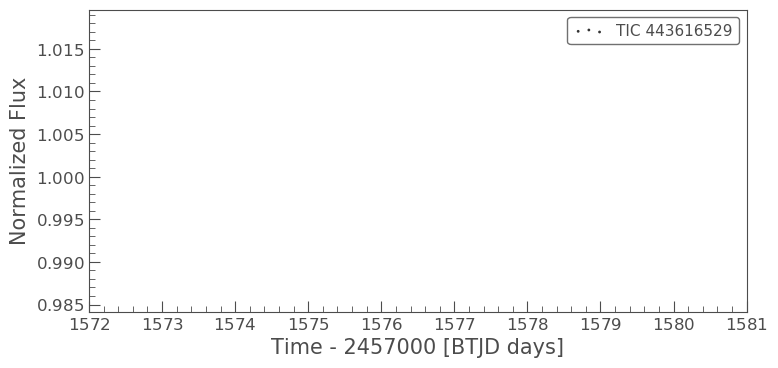

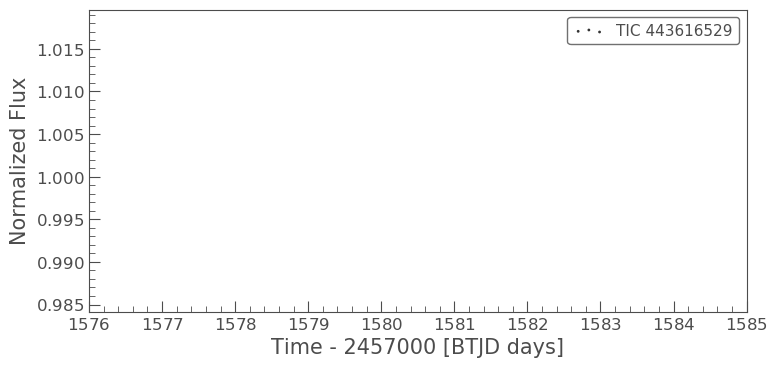

In [41]:
quality_mask = lcs[0].PDCSAP_FLUX.quality == 0

lcs[0].PDCSAP_FLUX.scatter()
lcs[0].PDCSAP_FLUX[quality_mask].scatter()

for i in range(0,10):
    lcs[0].PDCSAP_FLUX[quality_mask].scatter()
    plt.xlim(1540+i*4, 1545+(i+1)*4)

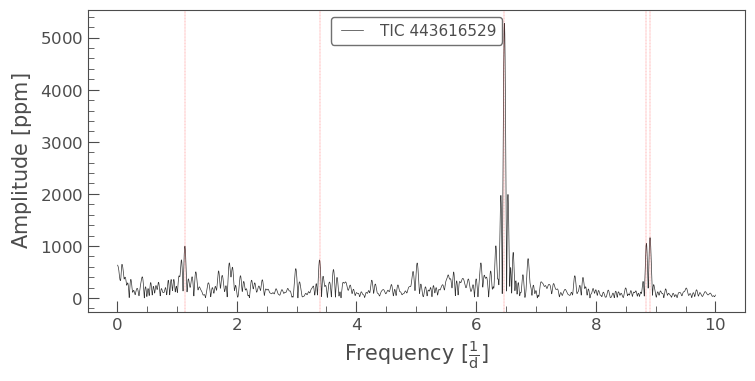

In [49]:
p = lcs[0].PDCSAP_FLUX[quality_mask].remove_nans().to_periodogram(method='LombScargle', minimum_frequency=0.01, maximum_frequency=10, oversample_factor=100, normalization = 'amplitude', freq_unit=1/u.day)
p.plot()
for xc in freqs:
    plt.axvline(x=xc, color='r', linestyle='--', linewidth=0.2)

(5, 10)

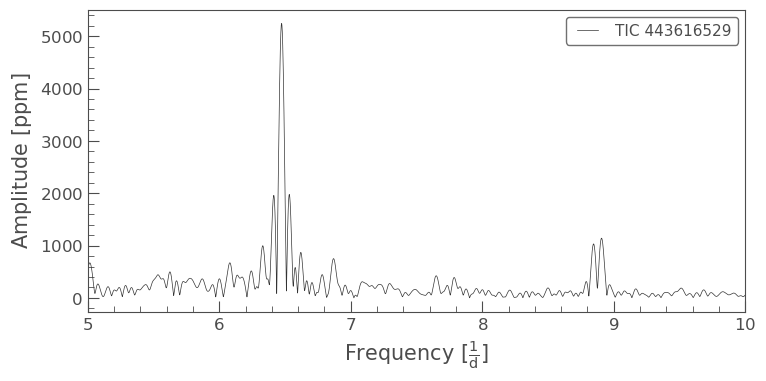

In [40]:
p = lcs[0].PDCSAP_FLUX[quality_mask].remove_nans().to_periodogram(method='LombScargle', minimum_frequency=0.01, maximum_frequency=20, oversample_factor=100, normalization = 'amplitude', freq_unit=1/u.day)
p.plot()
plt.xlim(5,10)

In [36]:
lc_reduced = lcs[0].PDCSAP_FLUX[quality_mask].remove_nans()

In [37]:
datapairs=np.stack((lc_reduced.time, -2.5*np.log10(lc_reduced.flux)), axis=-1)
np.savetxt('PhiLeo.txt',datapairs)

In [53]:
freqs = [6.47399,
        8.9064,
        1.1342,
        3.3850,
        8.8467]

ampls = [0.005693,
         0.001267,
         0.001084,
         0.000805,
         0.000750]

phs = [1.0306,
       2.6976,
       2.3573,
       2.9029,
       6.04717]

In [51]:
1/(max(lc_reduced.time) - min(lc_reduced.time))

0.04149380596850038

In [54]:
def fourier_sum(freqs, amps, phase, y_noise, x):
    y = []
    for j in range(0, len(x)):
        temp = []
        temp.append(y_noise[j])
        for i in range(0, len(freqs)):
            #next line: sum(amplitude_i * sine(freq_i * x + phase_i)) for all pulsations i 
            temp.append(amps[i]*np.sin(2.*np.pi*freqs[i]*x[j]+phase[i]))
        y.append(sum(temp))
    return y

In [59]:
t = np.arange(min(lc_reduced.time), max(lc_reduced.time), 0.001)

In [62]:
y = fourier_sum(freqs, ampls, phs, [0 for i in range(0, len(t))], t)

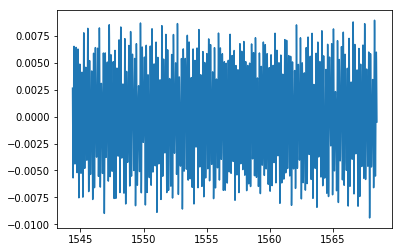

In [63]:
plt.plot(t, y)

(0.02, -0.02)

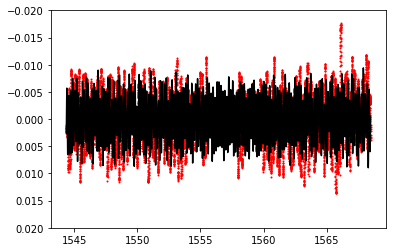

In [75]:
plt.scatter(lc_reduced.time, -2.5*np.log10(lc_reduced.flux)-np.mean(-2.5*np.log10(lc_reduced.flux)),s=1,c='r')
plt.plot(t, y,c='k')
plt.ylim(0.02,-0.02)

(1540, 1545)

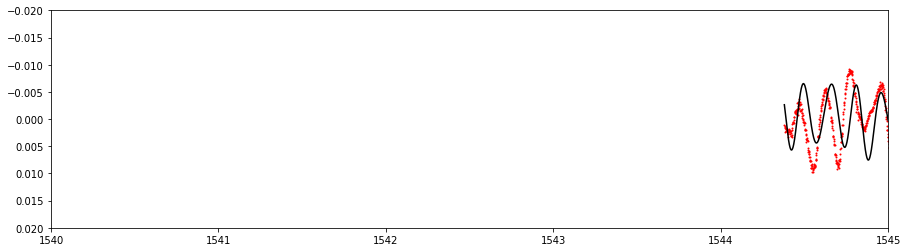

In [82]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))

ax.scatter(lc_reduced.time, -2.5*np.log10(lc_reduced.flux)-np.mean(-2.5*np.log10(lc_reduced.flux)),s=1,c='r')
ax.plot(t, -np.array(y),c='k')
ax.set_ylim(0.02,-0.02)
ax.set_xlim(1540, 1545)

(1560, 1565)

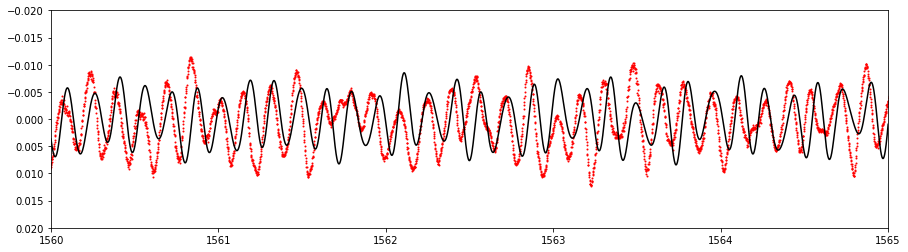

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))

ax.scatter(lc_reduced.time, -2.5*np.log10(lc_reduced.flux)-np.mean(-2.5*np.log10(lc_reduced.flux)),s=1,c='r')
ax.plot(t, -np.array(y),c='k')
ax.set_ylim(0.02,-0.02)
ax.set_xlim(1560, 1565)

In [83]:
sr = lk.search_lightcurvefile('5 Vul')
sr

No data found for target "5 Vul".
ERROR:lightkurve.search:No data found for target "5 Vul".


SearchResult containing 0 data products.